In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

# Step 2: Upload the Dataset
uploaded = files.upload()
data = pd.read_csv('world_population.csv')

# Step 3: Initial Data Exploration
print(data.info())
print(data.head())
print(data.describe(include='all'))

# Step 4: Data Preprocessing
# Drop unnecessary columns
data = data.drop(['CCA3', 'Capital'], axis=1)

# Check for duplicates and missing values
print(f"Number of duplicates: {data.duplicated().sum()}")
print(data.isnull().sum())

Saving world_population.csv to world_population.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population           

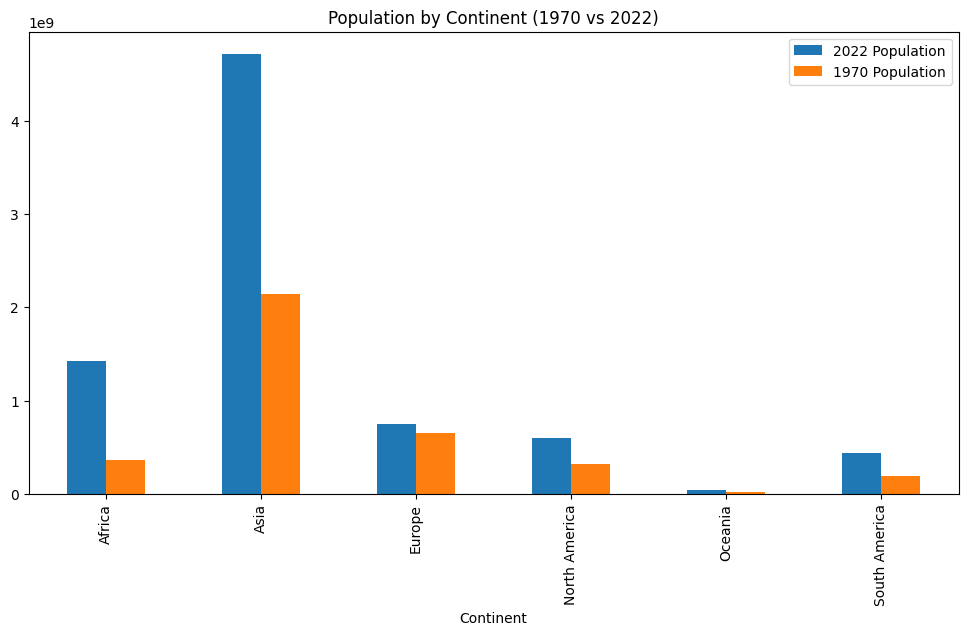

In [5]:
# Step 5: Feature Engineering
# Calculate population growth rates for key years
data['Growth Rate 2015-2020'] = (data['2020 Population'] - data['2015 Population']) / data['2015 Population'] * 100
data['Growth Rate 2000-2010'] = (data['2010 Population'] - data['2000 Population']) / data['2000 Population'] * 100

# Calculate population density change
data['Density Change'] = data['Density (per km²)'] - data['Area (km²)'] / data['2022 Population']

# Step 6: Exploratory Data Analysis (EDA)
# 1. Population trends by continent
continent_population = data.groupby('Continent')[['2022 Population', '1970 Population']].sum()
continent_population.plot(kind='bar', figsize=(12, 6), title='Population by Continent (1970 vs 2022)')
plt.show()

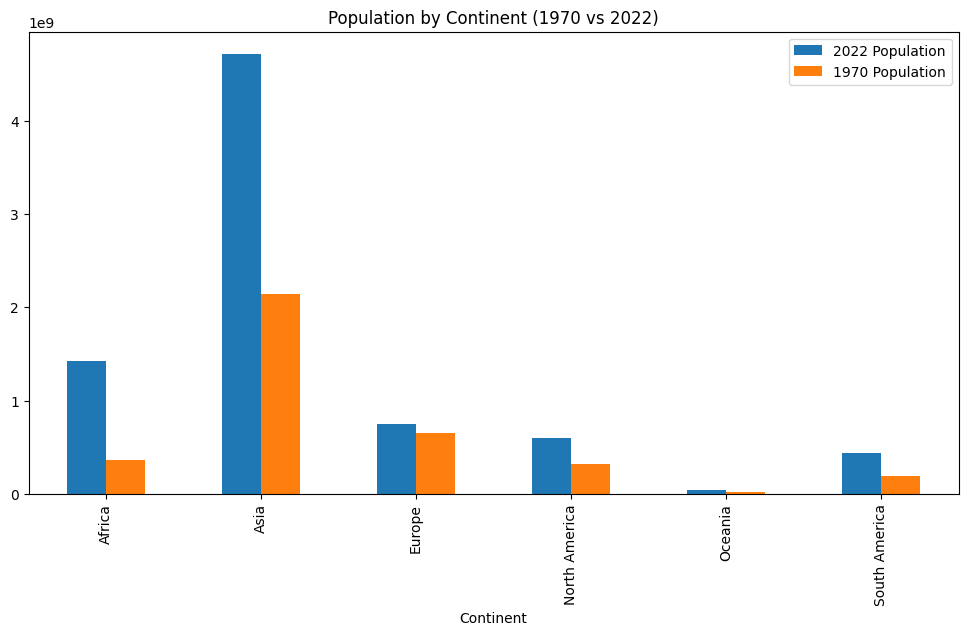

    Country/Territory  Growth Rate
133           Moldova       1.0691
164            Poland       1.0404
148             Niger       1.0378
202             Syria       1.0376
189          Slovakia       1.0359


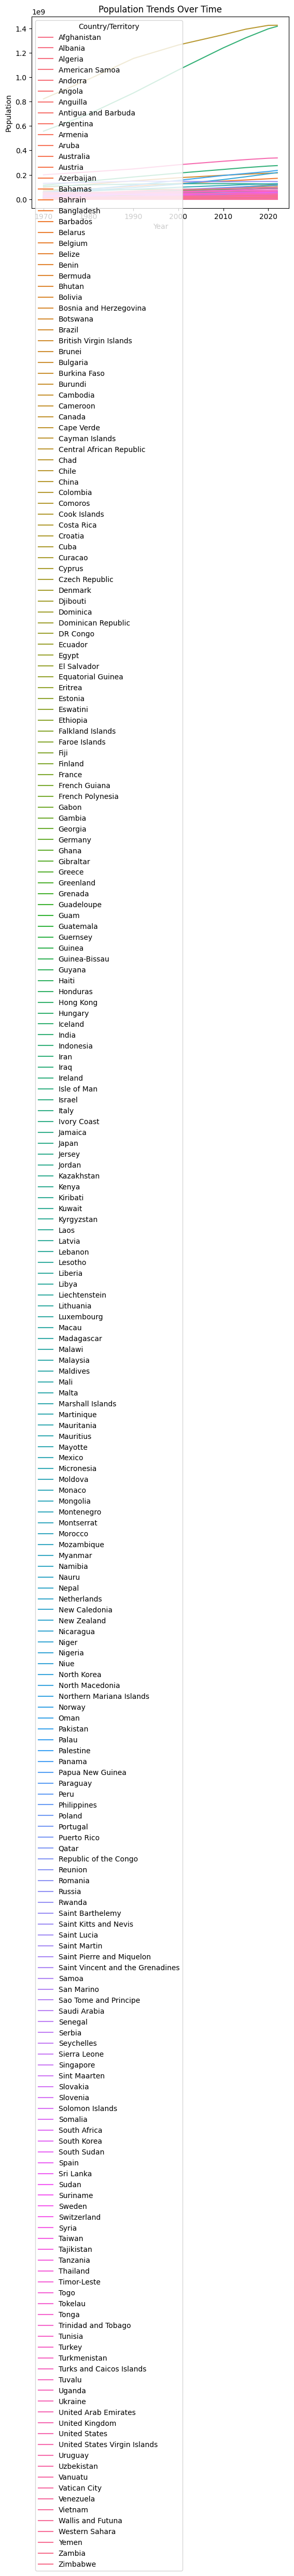

In [6]:
# Step 6: Exploratory Data Analysis (EDA)
# 1. Population trends by continent
continent_population = data.groupby('Continent')[['2022 Population', '1970 Population']].sum()
continent_population.plot(kind='bar', figsize=(12, 6), title='Population by Continent (1970 vs 2022)')
plt.show()

# 2. Top 5 countries by growth rate
top_5_growth = data.sort_values(by='Growth Rate', ascending=False).head(5)
print(top_5_growth[['Country/Territory', 'Growth Rate']])

# 3. Population trends over time
years = ['1970 Population', '1980 Population', '1990 Population', '2000 Population',
         '2010 Population', '2015 Population', '2020 Population', '2022 Population']
data_melted = data.melt(id_vars=['Country/Territory'], value_vars=years,
                        var_name='Year', value_name='Population')
data_melted['Year'] = data_melted['Year'].str.split().str[0].astype(int)

sns.lineplot(data=data_melted, x='Year', y='Population', hue='Country/Territory')
plt.title('Population Trends Over Time')
plt.show()

In [7]:
# Step 7: Model Building and Prediction
# Define features and target variable
features = ['1970 Population', '1980 Population', '1990 Population', '2000 Population',
            '2010 Population', '2015 Population', '2020 Population']
X = data[features]
y = data['2022 Population']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Step 8: Model Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 434906064028.4921
R^2 Score: 0.9998867924575544


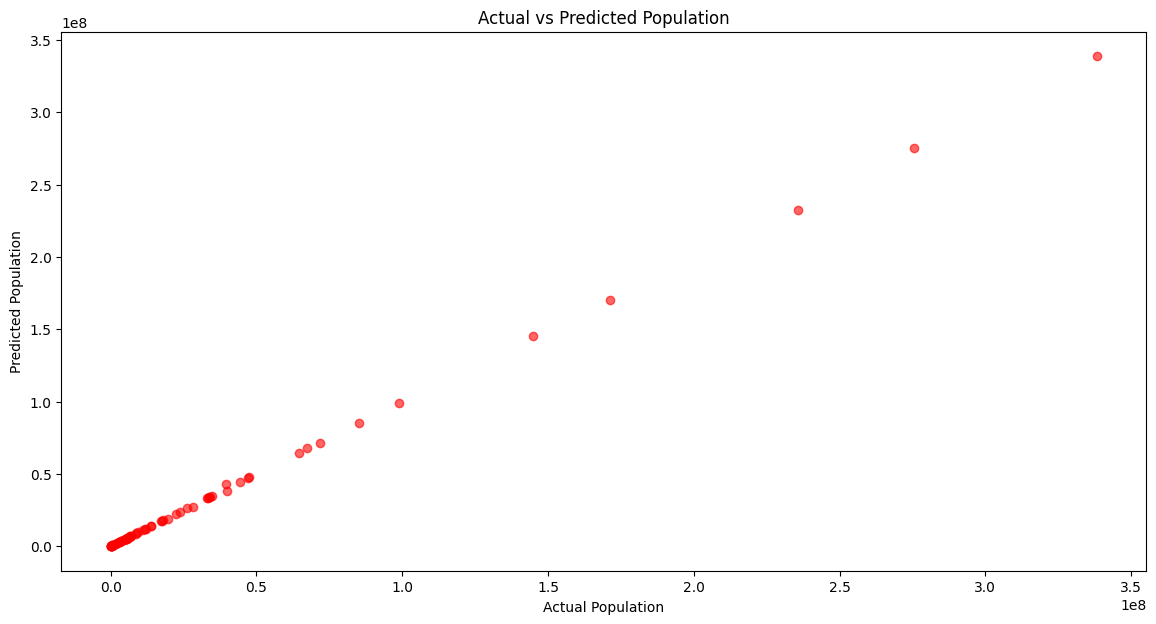

In [9]:
# Visualization of Results
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred, alpha=0.6, color='r')
plt.xlabel('Actual Population')
plt.ylabel('Predicted Population')
plt.title('Actual vs Predicted Population')
plt.show()

# Step 9: Save Cleaned Data
data.to_csv('cleaned_world_population.csv', index=False)